In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/website-data/Thecleverprogrammer.csv


In [5]:
web_data = pd.read_csv('/kaggle/input/website-data/Thecleverprogrammer.csv')
print(web_data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


The data contains two columns, date and traffic.

In [8]:
#Converting date to datetime
web_data["Date"] = pd.to_datetime(web_data["Date"], format = "%d/%m/%Y")

Visualizing the dialy traffic on the website

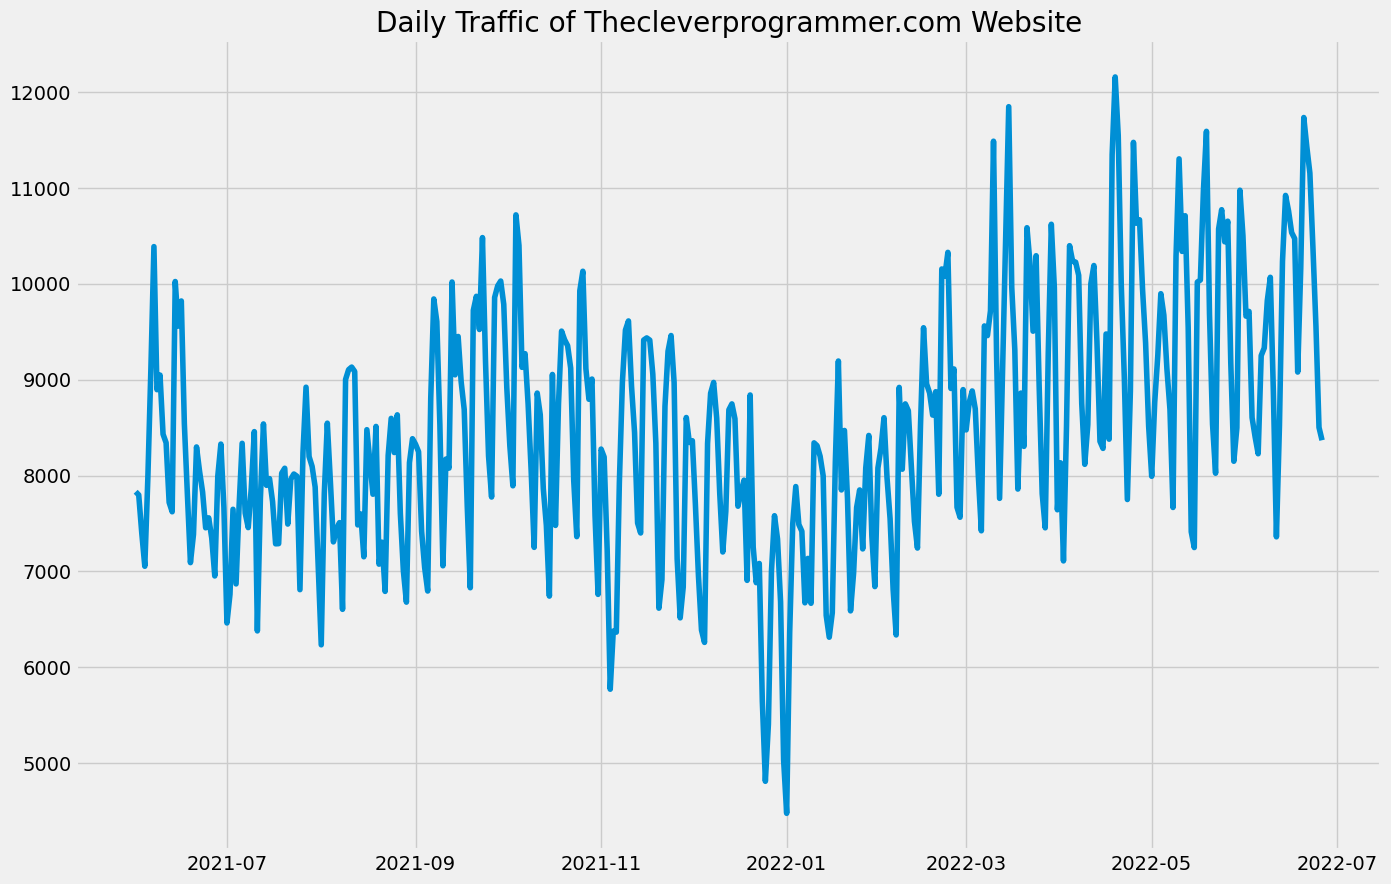

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(web_data['Date'], web_data['Views'])
plt.title("Daily Traffic of Thecleverprogrammer.com Website")
plt.show()

The website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on the problem of Time Series Forecasting.

<Figure size 640x480 with 0 Axes>

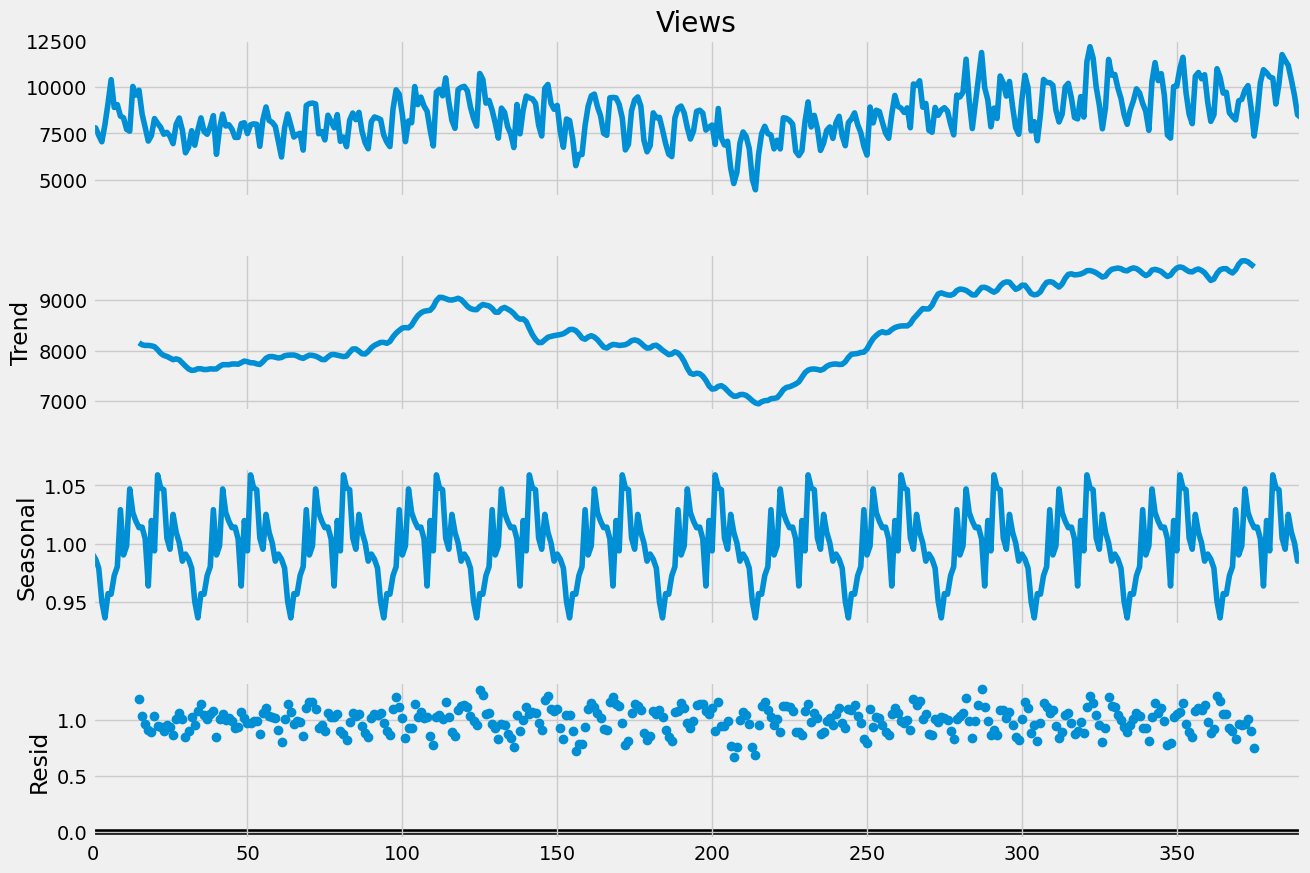

In [16]:
#Checking for stationarity and seasonality
result = seasonal_decompose(web_data['Views'],model='multiplicative',period=30)
fig = plt.figure()
fig= result.plot()
fig.set_size_inches(15,10)

Using the SARIMA model to forecast traffic on the website

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

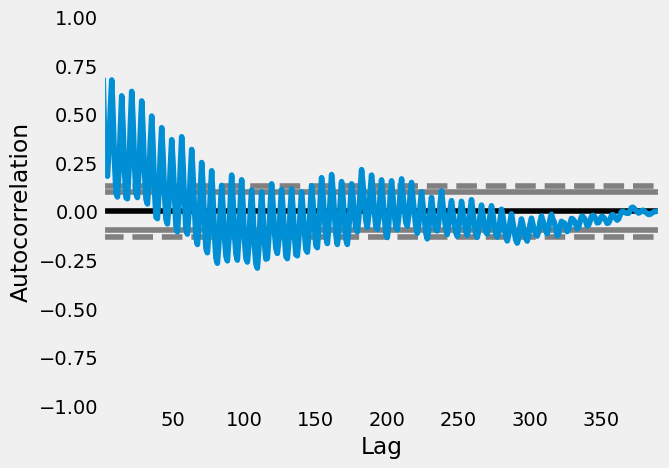

In [17]:
#to get the value of p and q, we do an autocorrelation plot
pd.plotting.autocorrelation_plot(web_data["Views"])

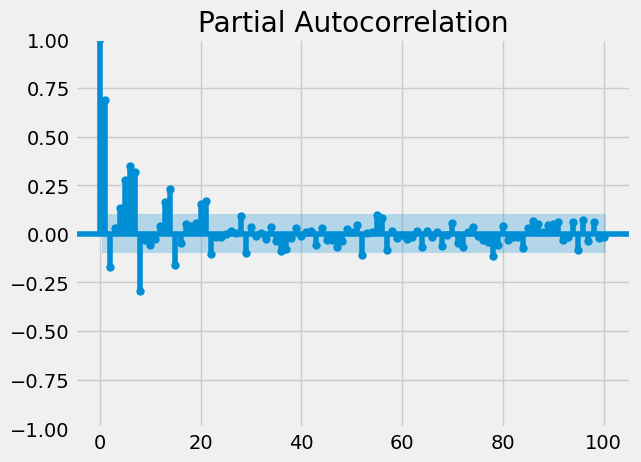

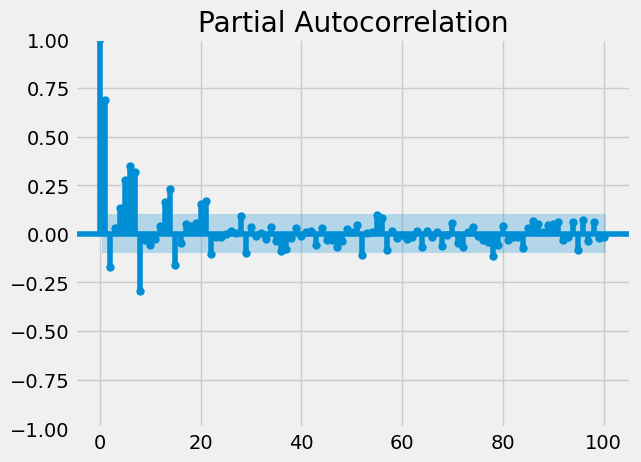

In [19]:
plot_pacf(web_data['Views'], lags= 100)

Splitting the data into test and train

In [29]:
web_data.set_index('Date', inplace=True)

# Now split using string-based slicing
train = web_data[:'2022-05-01']
test = web_data['2022-05-02':]

In [30]:
p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(train['Views'],
                        order =(p,d,q),seasonal_order= (p,d,q,12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  335
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -2644.461
Date:                            Wed, 16 Apr 2025   AIC                           5318.923
Time:                                    00:02:44   BIC                           5375.541
Sample:                                06-01-2021   HQIC                          5341.527
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7420      0.148      5.001      0.000       0.451       1.033
ar.L2         -0.7635      0.147   

Predicting website traffic for the next 30 days

In [31]:
train.shape

(335, 1)

In [32]:
predictions = model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

print(predictions)

2022-05-02     9976.116776
2022-05-03    10626.614786
2022-05-04    10476.372294
2022-05-05     9320.331207
2022-05-06     8762.838103
2022-05-07     8110.915036
2022-05-08     8833.256458
2022-05-09    10260.583499
2022-05-10    10875.578884
2022-05-11    10337.433440
2022-05-12     9688.595776
2022-05-13     8829.721418
2022-05-14     8902.109599
2022-05-15     8983.922316
2022-05-16    10210.671006
2022-05-17    10366.571628
2022-05-18    10740.943618
2022-05-19     9721.020735
2022-05-20     9083.861559
2022-05-21     8923.249973
2022-05-22     9138.511416
2022-05-23    10318.563078
2022-05-24    10595.688988
2022-05-25    10180.330644
2022-05-26     9699.185669
2022-05-27     8737.270588
2022-05-28     8873.419474
2022-05-29     9067.566768
2022-05-30    10103.950905
2022-05-31    10394.211213
2022-06-01    10551.689784
2022-06-02    10054.428318
2022-06-03     9138.377084
2022-06-04     8857.697281
2022-06-05     9301.064405
2022-06-06    10256.398987
2022-06-07    10872.664968
2

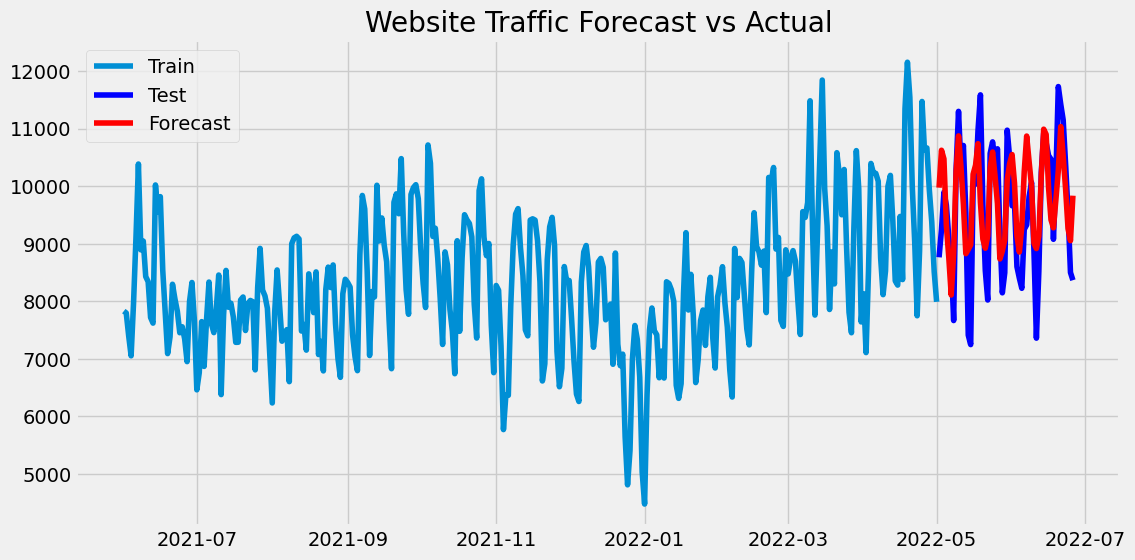

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Views'], label='Train')
plt.plot(test.index, test['Views'], label='Test', color='blue')
plt.plot(test.index, predictions, label='Forecast', color='red')
plt.legend()
plt.title('Website Traffic Forecast vs Actual')
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse = mean_squared_error(test['Views'], predictions)
mae = mean_absolute_error(test['Views'], predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 653.6457568152006
MSE: 662662.7178446563
RMSE: 814.0409804454911


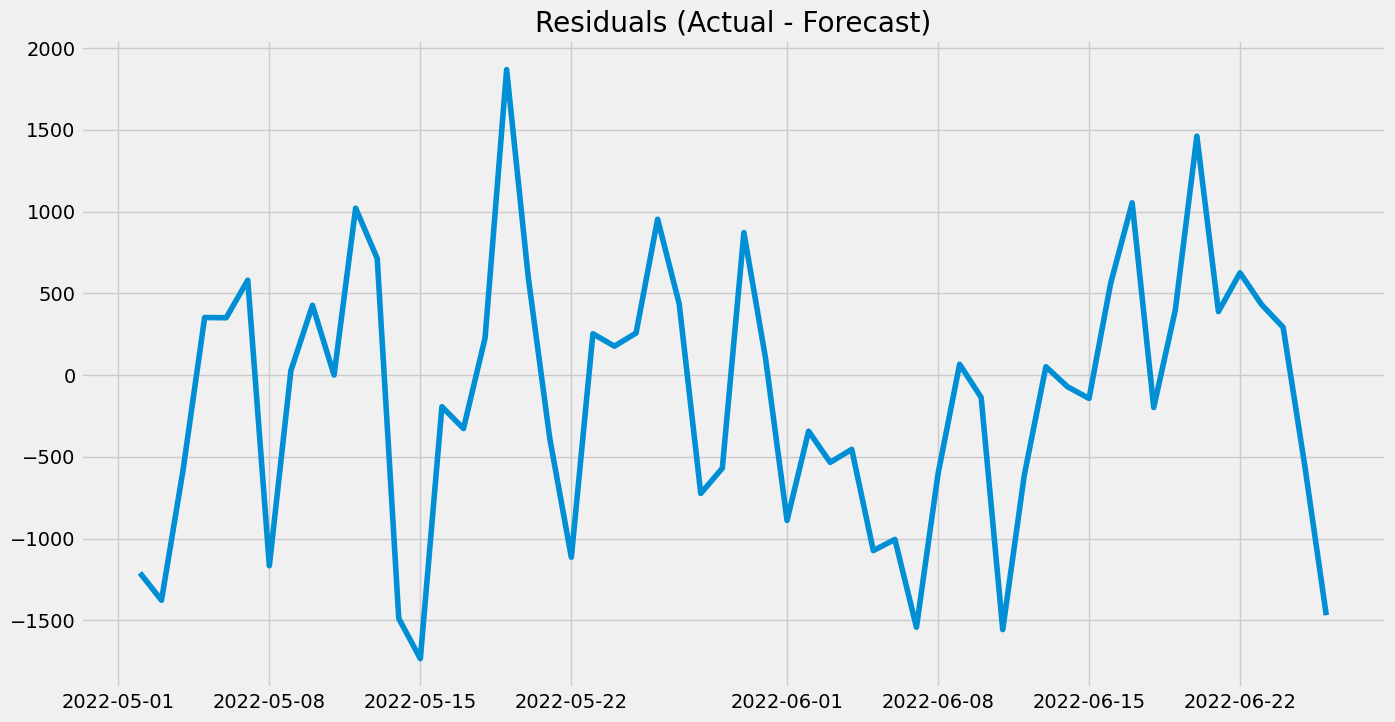

In [37]:
residuals = test['Views'] - predictions

plt.figure(figsize=(15, 8))
plt.plot(residuals)
plt.title("Residuals (Actual - Forecast)")
plt.show()
